In [52]:
import os
import sys
import numpy as np
import matplotlib
matplotlib.use('Agg')
from matplotlib import pyplot as plt
from astropy.table import Table,Column
from astropy.io import fits
from PIL import Image
import warnings
import glob
warnings.filterwarnings('ignore')

In [53]:
homedir = os.getenv('HOME')

sys.path.append(homedir+'/github/halphagui/')
import photwrapper
from image_functions import *

cwd = homedir+'/Desktop/gbtresearch/'
os.chdir(cwd)

In [54]:
datapath = homedir+'/Desktop/gbtresearch/data/gbt22a_430_sample_legacy.fits'

# creates table from the fits, prints out first 10 galaxies
matchedTab=Table.read(cwd+'data/UAT_GBT_matched.fits')
gbt=Table.read(datapath)

In [55]:
ptab

sma_arcsec,sma_pix,flux,flux_err,sb,sb_err,sb_snr,flux_erg,flux_erg_err,mag,mag_err,sb_erg_sqarcsec,sb_erg_sqarcsec_err,sb_mag_sqarcsec,sb_mag_sqarcsec_err
arcsec,pix,adu / s,adu / s,adu / (s pix2),adu / (s pix2),,erg / (s cm2),erg / (s cm2),mag,mag,erg / (s arcsec2 cm2),erg / (s arcsec2 cm2),mag / arcsec2,mag / arcsec2
float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
5.29375000000077,1.9250000000000003,1919.1118,--,283.1636,--,--,7.788857e-12,--,14.292249,--,1.5196568e-13,--,18.56657,--
11.55000000000168,4.2,4889.7476,--,116.56294,--,--,1.9845403e-11,--,13.276784,--,6.2555945e-14,--,19.530262,--
18.76875000000273,6.825,6893.4287,--,37.854656,--,--,2.797749e-11,--,12.903912,--,2.0315494e-14,--,20.751366,--
26.950000000003914,9.799999999999999,7791.114,--,9.923708,--,--,3.1620814e-11,--,12.771001,--,5.325766e-15,--,22.204979,--
36.093750000005244,13.125,7988.5215,--,1.415995,--,--,3.2422006e-11,--,12.7438345,--,7.5992334e-16,--,24.31901,--
46.20000000000672,16.8,8008.68,--,0.100223474,--,--,3.2503823e-11,--,12.741097,--,5.3787026e-17,--,27.19424,--
57.26875000000833,20.825000000000003,7991.1226,--,-0.06339015,--,--,3.2432564e-11,--,12.743481,--,-3.4019652e-17,--,--,--
69.30000000001007,25.2,8099.135,--,0.29329157,--,--,3.287094e-11,--,12.728903,--,1.5740106e-16,--,26.028416,--


In [56]:
matchedTab

mu,e_mu,redshift,AGCnr,radeg,decdeg,zmag,snr,name,RA,DEC,logMstar_mag,logMstar_flux
float64,float64,float64,int32,float64,float64,float32,float32,int64,float64,float64,"float64[3,1]","float64[3,1]"
34.49553944,0.17136514,0.024197,200208,153.925842,55.667225,0.0,0.0,200208,153.925842,55.667225,0.0 .. 0.0,0.0 .. 0.0
33.30398818,0.181636711,0.01538,28810,191.87793,-39.570831,13.3,8.3,28810,191.87793,-39.570831,0.0 .. 0.0,0.0 .. 0.0
34.85559344,0.150259919,0.02942,27994,174.497513,-32.325001,14.1,0.0,27994,174.497513,-32.325001,0.0 .. 0.0,0.0 .. 0.0
34.0275196,0.165129023,0.02127,3770,108.870834,23.428055,15.4,0.0,3770,108.870834,23.428055,0.0 .. 0.0,0.0 .. 0.0
35.34581797,0.156411953,0.0353,257439,238.232086,65.935555,17.0,0.0,257439,238.232086,65.935555,0.0 .. 0.0,0.0 .. 0.0
34.28382908,0.185978511,0.02281,28479,185.316666,-21.995277,0.0,3.1,28479,185.316666,-21.995277,0.0 .. 0.0,0.0 .. 0.0
34.64679579,0.145703719,0.02675,1993,37.916252,39.378056,14.3,9.0,1993,37.916252,39.378056,0.0 .. 0.0,0.0 .. 0.0
33.42247539,0.178816907,0.01752,3329,84.134995,16.640833,16.0,9.7,3329,84.134995,16.640833,0.0 .. 0.0,0.0 .. 0.0
33.13950546,0.193577933,0.01774,646,15.859582,32.236946,15.0,5.9,646,15.859582,32.236946,0.0 .. 0.0,0.0 .. 0.0


In [770]:
#matchedTab.write('data/UAT_GBT_matched_withMasses.fits',format='fits')

In [772]:
#a=Table.read('data/UAT_GBT_matched_withMasses.fits')
#a

In [20]:
#data1=[np.array([[0.0], [0.0], [0.0]]) for i in range(len(matchedTab))]
#data1[0]

In [21]:
#col4= Column(name='logMstar_flux',data=data1)
#col1= Column(name='logMstar_mag',data=data1)
#col2= Column(name='logMstar_flux',data=data1)

In [22]:
#matchedTab.add_column(col2)

In [23]:
#matchedTab['logMstar_mag'][0].shape

In [57]:
def getLogMass(LW1_array):
    '''
    Reads in the W1 luminosities calculations with the +/- error on the distance modulus, including the calculation without error propagation, 
    and converts those luminosities into stellar masses, via equation from Jarrett 2023.

    Inputs:
        LW1_upper = W1 luminosity including the +error on the distance modulus; distance modulus will be the largest source of error; erg/s
        LW1_med =  W1 luminosity NOT including the +/-error on the distance modulus; erg/s
        LW1_lower = W1 luminosity including the -error on the distance modulus; distance modulus will be the largest source of error; erg/s
        
    RETURNS:
        logMstar = numpy array of including the upper, median, and lower W1 stellar mass calculations.
    '''
    
    A0= -12.62185; A1= 5.00155; A2= -0.43857; A3= 0.01593
    
    logMstar_upper=A0+(A1*np.log10(LW1_array[0]))+(A2*(np.log10(LW1_array[0]))**2)+(A3*(np.log10(LW1_array[0]))**3)
    logMstar_med=A0+(A1*np.log10(LW1_array[1]))+(A2*(np.log10(LW1_array[1]))**2)+(A3*(np.log10(LW1_array[1]))**3)
    logMstar_lower=A0+(A1*np.log10(LW1_array[2]))+(A2*(np.log10(LW1_array[2]))**2)+(A3*(np.log10(LW1_array[2]))**3)
    
    logMstar=np.array([logMstar_upper,logMstar_med,logMstar_lower])
    
    return logMstar

def getLW1(Fenc,mu,e_mu,m):
    '''
    Takes in ptab and matched table values for distance modulus plus error, then calculates the luminosity two
    different ways; one in relation to the distance modulus and absolute magnitude, and the other through the flux-
    luminosity relation using the max enclosed flux from photutils.

    Inputs:
        Fenc = 
        mu = 
        e_mu = 
        m =

    RETURNS:
        LW1_mag = numpy array including the upper, median, and lower W1 Luminosities via distance modulus, mu, 
                     and absolute magnitude of galaxy; erg/s.
        LW1_flux = numpy array including the upper, median, and lower W1 Luminosities via flux-luminosity relation;
                     erg/s.
    '''

    #ind=np.where(galaxyTab['AGCnr']==galNum)
    
    #maxFenc=np.max(ptab['flux_erg']) # flux in ergs/cm^2 s
    #mu=galaxyTab['mu'][ind] # distance modulus
    #mu_err=galaxyTab['e_mu'][ind]
    
    d_Upper=(10**((mu+e_mu)/5+1))*3.086E18 # gets d in pc, converts to cm; includes upper error for mu
    d_Med=(10**(mu/5+1))*3.086E18 # gets d in pc, converts to cm
    d_Lower=(10**((mu-e_mu)/5+1))*3.086E18 # gets d in pc, converts to cm; includes lower error for mu
    d=np.array([d_Upper,d_Med,d_Lower])
    
    ###############################################################

    ### W1 Luminosity via Jarrett
    #m=np.min(ptab['mag'])

    M_Upper=m-(mu+e_mu)
    M_Med=m-mu
    M_Lower=m-(mu-e_mu)
    
    M=np.array([M_Upper,M_Med,M_Lower])
    
    LW1_mag_Upper=10**(-0.4*(M_Upper-3.24))
    LW1_mag_Med=10**(-0.4*(M_Med-3.24))
    LW1_mag_Lower=10**(-0.4*(M_Lower-3.24))
    
    LW1_mag=np.array([LW1_mag_Upper,LW1_mag_Med,LW1_mag_Lower])

    ### Luminosity via enclosed flux
    LW1_flux_Upper=Fenc*(4*np.pi*d_Upper**2)/3.846E33
    LW1_flux_Med=Fenc*(4*np.pi*d_Med**2)/3.846E33
    LW1_flux_Lower=Fenc*(4*np.pi*d_Lower**2)/3.846E33
    
    LW1_flux=np.array([LW1_flux_Upper,LW1_flux_Med,LW1_flux_Lower])

    return LW1_mag,LW1_flux

In [58]:
def getMass(myGal,galTable,plotting=False,imsize=120,makeMask=True,changeSize=False,verbose=False):
    '''
    Reads in a table of galaxy coordinates to get wise/legacy images to calculate photometry; W1 phot will be converted
    into a flux, then converted into a stellar mass.
    
    Inputs:
        myGal = table entry of galactic coordinate data; needs 'name,' 'RA,' and 'DEC' columns
        plotting = conditional to plot each photwrapper image step; default set to False
        imsize = length/width of legacy/WISE image cutout; default set to 120; units: pixels
        makeMask = conditional to mask off subtracted sky objects from segmentation image; default set to True
        changeSize = conditional to search for previously made unwise images, deletes them, and remakes them with given imsize; 
                        default set to False
        verbose = conditional to have function talk to you through the processes within; be verbose!
    
    RETURNS:
        ptab = table created from output photometry file via photwrapper
        e = photwrapper ellipse data
    '''
    
    # get sky coords and galaxy AGC ID from input table
    ra = myGal['RA']
    dec = myGal['DEC']
    galID = f"AGC{myGal['AGCnr']:06d}"; galNum = myGal['AGCnr']
    
    # setting pixel scaling
    UNWISE_PIXSCALE = 2.75
    LEGACY_PIXSCALE = 1
    
    if changeSize:
        # checks to see if unwise images were created
        dstring=f'{galID}-unwise*'
        flist=glob.glob(dstring)
        # removes image if it exists in the directory
        for f in flist:
            if os.path.exists(f):
                os.remove(f)
    
    # gets the W1-4 and legacy images for the galaxy
    legacyImgs, wiseImgs = display_legacy_unwise(ra,dec,galID,imsize_arcsec=imsize)
    
    # can be changed to different bands
    imname = wiseImgs[0]
    
    %matplotlib inline
    
    if plotting:
    
        print()
    
        plt.figure(figsize=(12,6.5))

        # concatinate lists
        imnames = ['grz','g','r','z']
        # plot legacy images in top row
        for i,im in enumerate(legacyImgs):
            plt.subplot(2,4,i+1)
            if i == 0:
                # display jpg
                t = Image.open(im)
                plt.imshow(t,origin='upper')
            else:
                data = fits.getdata(im)
                display_image(data,lowrange=False,percent=95)
            plt.title(imnames[i],fontsize=14)

        # plot WISE images
        imnames = ['W1','W2','W3','W4']
        for i,im in enumerate(wiseImgs):
            plt.subplot(2,4,4+i+1)
            data = fits.getdata(im)
            display_image(data,percent=92)
            plt.title(imnames[i],fontsize=14)
            
        hdu = fits.open(imname)
        data = hdu[0].data
        hdu.close()
    
        plt.figure()
        plt.title(f'{imname}')
        display_image(data)
    
    ### PHOTWRAPPER ####
        
    e = photwrapper.ellipse(imname)
    
    e.detect_objects()
        
    test = e.cat.to_table()
    
    e.find_central_object()
    
    if makeMask:
        e.get_mask_from_segmentation()

    e.get_ellipse_guess()
    
    print(); e.measure_phot()     
    e.calc_sb()
    e.convert_units()
    
    print(); e.write_phot_tables()
    e.write_phot_fits_tables(); print()
        
    if plotting:
        
        e.show_seg_aperture()
        e.draw_guess_ellipse_mpl()
        e.draw_phot_apertures()
    
    
    ptabName = imname.replace('.fits','-phot.fits')
    ptab = Table.read(ptabName)
    
    plt.figure(figsize=(12,5))
    
    plt.subplot(1,2,1)
    plt.plot(ptab['sma_arcsec'],ptab['flux_erg'])
    plt.title(f'{galID} $F_{{enc}}$ Vs. SMA',fontsize=16)
    plt.xlabel("Semi-major axis (arcsec)",fontsize=14)
    plt.ylabel("$F_{enc}$ (erg / $cm^2$ s)",fontsize=14)
    
    plt.subplot(1,2,2)
    plt.plot(ptab['sma_arcsec'],ptab['mag'])
    plt.title(f'{galID} Magnitude Vs. SMA',fontsize=16)
    plt.xlabel("Semi-major axis (arcsec)",fontsize=14)
    plt.ylabel("Magnitude",fontsize=14)

    plt.show()

    if verbose:
        print(f"Max enclosed flux: {np.max(ptab['flux']):.2e}")
        print(f"Max SMA: {np.max(ptab['sma_arcsec'])}"); print()

    #################################
    ### Stellar Mass Calculations ###
    #################################
    
    maxFenc=np.max(ptab['flux_erg']) # max enclosed flux in ergs/cm^2 s
    mu=myGal['mu'] # distance modulus
    mu_err=myGal['e_mu'] # distance modulus error
    mmag=np.min(ptab['mag']) # source magnitude via photutils

    
    LW1_mag,LW1_flux=getLW1(maxFenc,mu,mu_err,mmag)        

    logMstar_mag=getLogMass(LW1_mag)
    logMstar_flux=getLogMass(LW1_flux)

    if verbose:
        print(f"LW1_mag array: {LW1_mag}"); print()
        print(f"LW1_flux array: {LW1_flux}"); print()
        
        print(f'Stellar masses based on magnitude: (upper, median, lower) \n{logMstar_mag}'); print()
        print(f'Stellar masses based on flux: (upper, median, lower) \n{logMstar_flux}')

    ### Takes the log stellar mass arrays and adds them to their respective columns/entries in matchedTab
    ### Each array: [ [Upper error mass], [Median mass], [Lower error mass] ]
    galTable['logMstar_mag']=logMstar_mag
    galTable['logMstar_flux']=logMstar_flux

    ### insert writing out the matchedTab as a .csv and overwrite previous table;
    ### this can act as a 'save' for the table so data isnt lost

    # this rewrites the withMasses fits file in the data folder every time a new mass is calculated,
    # this will keep track of all the masses that have been done without altering the primary fits file.
    galTable.write('data/UAT_GBT_matched_withMasses.fits',format='fits',overwrite=True)
    
    return ptab,e,logMstar_mag,logMstar_flux

In [50]:
np.where(matchedTab['AGCnr']==257439)

(array([4]),)

wise image size =  44
downloading unwise images
http://unwise.me/cutout_fits?version=allwise&ra=238.23209&dec=65.93555&size=44&bands=1234
0 g
retrieving  AGC257439-legacy-120.jpg
retrieving  AGC257439-legacy-120-g.fits
http://legacysurvey.org/viewer/cutout.fits?ra=238.232086&dec=65.935555&layer=dr8&size=120&pixscale=1&bands=g
return from get_legacy_images =  ('AGC257439-legacy-120-g.fits', 'AGC257439-legacy-120.jpg') g AGC257439
1 r
previously downloaded  AGC257439-legacy-120.jpg
retrieving  AGC257439-legacy-120-r.fits
http://legacysurvey.org/viewer/cutout.fits?ra=238.232086&dec=65.935555&layer=dr8&size=120&pixscale=1&bands=r
return from get_legacy_images =  ('AGC257439-legacy-120-r.fits', 'AGC257439-legacy-120.jpg') r AGC257439
2 z
previously downloaded  AGC257439-legacy-120.jpg
retrieving  AGC257439-legacy-120-z.fits
http://legacysurvey.org/viewer/cutout.fits?ra=238.232086&dec=65.935555&layer=dr8&size=120&pixscale=1&bands=z
return from get_legacy_images =  ('AGC257439-legacy-120-z.fi

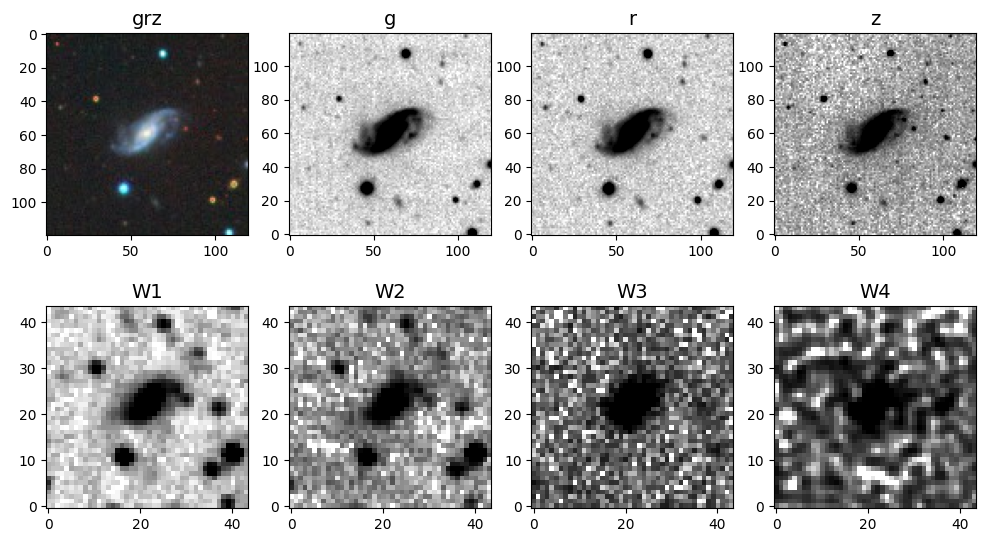

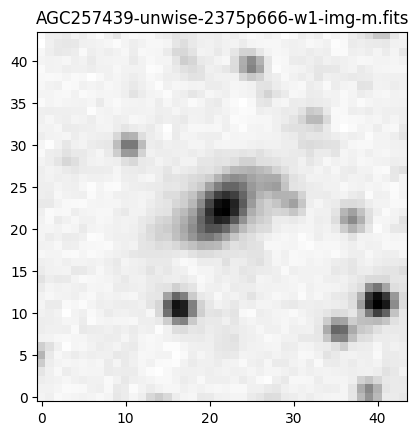

<Figure size 640x480 with 0 Axes>

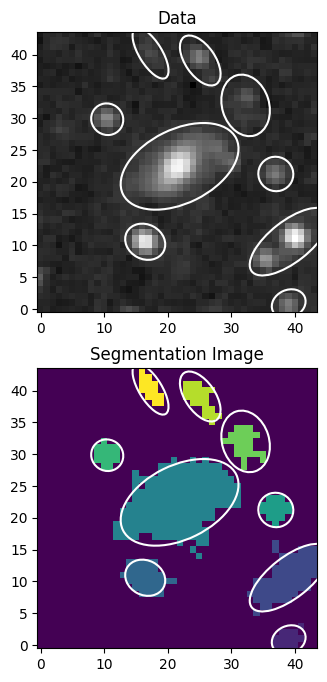

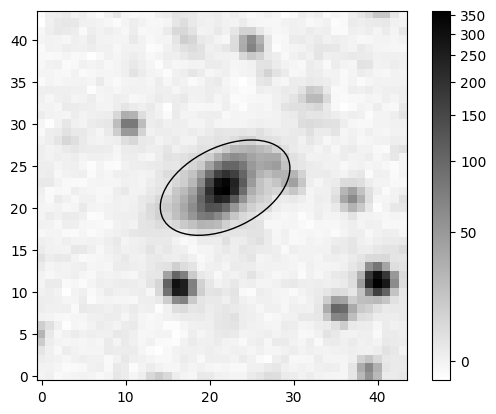

<Figure size 640x480 with 0 Axes>

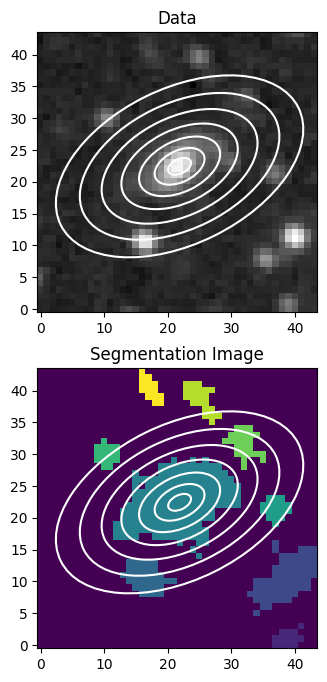

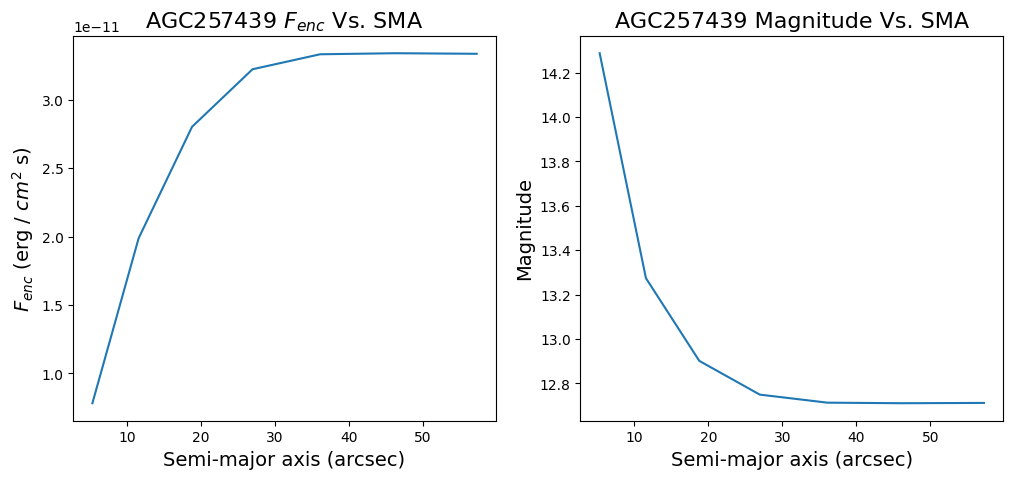

Max enclosed flux: 8.23e+03
Max SMA: 57.26875000000833

LW1_mag array: [2.58546303e+10 2.23858480e+10 1.93824543e+10]

LW1_flux array: [1.65159684e+10 1.43001062e+10 1.23815348e+10]

Stellar masses based on magnitude: (upper, median, lower) 
[9.89077498 9.82532585 9.76031556]

Stellar masses based on flux: (upper, median, lower) 
[9.68858016 9.62441937 9.56062461]


ValueError: could not broadcast input array from shape (3,) into shape (191,3,1)

In [60]:
ptab,e,logMstar_mag,logMstar_flux = getMass(
    
    matchedTab[4], 
    
    plotting=True,
    
    imsize=120, 
    
    makeMask=True,
    
    changeSize=True,

    verbose=True
    
)

In [696]:
print(f'Stellar masses based on magnitude: (upper, median, lower) \n{logMstar_mag}'); print()
print(f'Stellar masses based on flux: (upper, median, lower) \n{logMstar_flux}')

Stellar masses based on magnitude: (upper, median, lower) 
[[9.60215554]
 [9.47549699]
 [9.35007624]]

Stellar masses based on flux: (upper, median, lower) 
[[9.40514411]
 [9.28033522]
 [9.15647446]]


In [300]:
e.cat.to_table()

label,xcentroid,ycentroid,sky_centroid,bbox_xmin,bbox_xmax,bbox_ymin,bbox_ymax,area,semimajor_sigma,semiminor_sigma,orientation,eccentricity,min_value,max_value,local_background,segment_flux,segment_fluxerr,kron_flux,kron_fluxerr
,,,,,,,,pix2,pix,pix,deg,,,,,,,,
int64,float64,float64,object,int64,int64,int64,int64,float64,float64,float64,float64,float64,float32,float32,float64,float32,float64,float64,float64
1,33.06869130376704,2.9780286574034442,None,23,40,0,9,107.0,1.4031247322613876,1.2253915065117087,8.433735110551886,0.4871283034363552,7.804879,3436.5085,0.0,20592.29,nan,19496.729389072618,nan
2,56.18590933920254,4.242868355146012,None,50,63,1,9,57.0,3.1798955862851868,1.2910625474417585,-16.661541244268093,0.9138695922028505,7.789236,68.584724,0.0,1058.2179,nan,1442.120953498715,nan
3,33.82389938716037,16.36281095518811,None,32,36,15,19,17.0,1.0284846305246367,0.9775616624574849,-79.83286227046221,0.31076315630241874,8.379109,44.324207,0.0,329.88165,nan,744.5561446863404,nan
4,32.37820631373217,32.18665785967259,None,17,48,20,43,372.0,5.633464287887082,2.6990590978927056,-25.89098576967808,0.8777538966333527,7.7985053,351.84195,0.0,17857.613,nan,18620.73501508912,nan
5,52.66664035162187,26.97539979303978,None,50,54,26,28,10.0,1.1076432622774703,0.6061484272620443,30.890729057266295,0.8369747155827073,8.031821,33.43292,0.0,171.70819,nan,229.43191193411866,nan
6,38.49768683095604,45.439480168343664,None,33,43,43,49,33.0,2.160194496699559,1.1258481759753411,17.049831238217585,0.8534473438418224,7.7983165,78.920044,0.0,726.59534,nan,1149.7796329258167,nan
7,51.92257634623061,57.167071943433385,None,50,54,53,60,23.0,1.1409262605251513,0.8791002557312547,-81.40115797404528,0.637422439757467,8.834472,187.18225,0.0,1104.9374,nan,1183.0659104850815,nan


In [301]:
ptab

sma_arcsec,sma_pix,flux,flux_err,sb,sb_err,sb_snr,flux_erg,flux_erg_err,mag,mag_err,sb_erg_sqarcsec,sb_erg_sqarcsec_err,sb_mag_sqarcsec,sb_mag_sqarcsec_err
arcsec,pix,adu / s,adu / s,adu / (s pix2),adu / (s pix2),,erg / (s cm2),erg / (s cm2),mag,mag,erg / (s arcsec2 cm2),erg / (s arcsec2 cm2),mag / arcsec2,mag / arcsec2
float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
5.29375000000077,1.9250000000000003,1674.2767,--,300.17813,--,--,6.795176e-12,--,14.440433,--,1.6109688e-13,--,18.503216,--
11.55000000000168,4.2,5517.0244,--,183.21779,--,--,2.2391252e-11,--,13.145738,--,9.832767e-14,--,19.039244,--
18.76875000000273,6.825,9730.437,--,96.72513,--,--,3.9491698e-11,--,12.52967,--,5.1909567e-14,--,19.732815,--
26.950000000003914,9.799999999999999,13556.608,--,51.395977,--,--,5.50205e-11,--,12.169622,--,2.7582727e-14,--,20.41934,--
36.093750000005244,13.125,16305.274,--,23.9571,--,--,6.617616e-11,--,11.96918,--,1.2857079e-14,--,21.248077,--
46.20000000000672,16.8,17947.543,--,9.92124,--,--,7.2841434e-11,--,11.864987,--,5.324441e-15,--,22.205248,--
57.26875000000833,20.825000000000003,18594.047,--,2.8362339,--,--,7.5465315e-11,--,11.826565,--,1.5221243e-15,--,23.564808,--
69.30000000001007,25.2,19091.309,--,1.6406897,--,--,7.748349e-11,--,11.797911,--,8.805105e-16,--,24.159098,--


In [18]:
matchedTab

mu,e_mu,redshift,AGCnr,radeg,decdeg,zmag,snr,name,RA,DEC,logMstar_mag,logMstar_flux
float64,float64,float64,int32,float64,float64,float32,float32,int64,float64,float64,"float64[3,1]","float64[3,1]"
34.49553944,0.17136514,0.024197,200208,153.925842,55.667225,0.0,0.0,200208,153.925842,55.667225,0.0 .. 0.0,0.0 .. 0.0
33.30398818,0.181636711,0.01538,28810,191.87793,-39.570831,13.3,8.3,28810,191.87793,-39.570831,0.0 .. 0.0,0.0 .. 0.0
34.85559344,0.150259919,0.02942,27994,174.497513,-32.325001,14.1,0.0,27994,174.497513,-32.325001,0.0 .. 0.0,0.0 .. 0.0
34.0275196,0.165129023,0.02127,3770,108.870834,23.428055,15.4,0.0,3770,108.870834,23.428055,0.0 .. 0.0,0.0 .. 0.0
35.34581797,0.156411953,0.0353,257439,238.232086,65.935555,17.0,0.0,257439,238.232086,65.935555,0.0 .. 0.0,0.0 .. 0.0
34.28382908,0.185978511,0.02281,28479,185.316666,-21.995277,0.0,3.1,28479,185.316666,-21.995277,0.0 .. 0.0,0.0 .. 0.0
34.64679579,0.145703719,0.02675,1993,37.916252,39.378056,14.3,9.0,1993,37.916252,39.378056,0.0 .. 0.0,0.0 .. 0.0
33.42247539,0.178816907,0.01752,3329,84.134995,16.640833,16.0,9.7,3329,84.134995,16.640833,0.0 .. 0.0,0.0 .. 0.0
33.13950546,0.193577933,0.01774,646,15.859582,32.236946,15.0,5.9,646,15.859582,32.236946,0.0 .. 0.0,0.0 .. 0.0


In [32]:
test=Table.read('data/testMatch4.fits')
test

mu,e_mu,redshift,AGCnr,radeg,decdeg,name,RA,DEC
float64,float64,float64,int32,float64,float64,int64,float64,float64
34.49553944,0.17136514,0.024197,200208,153.925842,55.667225,200208,153.925842,55.667225
33.30398818,0.181636711,0.01538,28810,191.87793,-39.570831,28810,191.87793,-39.570831
34.85559344,0.150259919,0.02942,27994,174.497513,-32.325001,27994,174.497513,-32.325001
34.0275196,0.165129023,0.02127,3770,108.870834,23.428055,3770,108.870834,23.428055
35.34581797,0.156411953,0.0353,257439,238.232086,65.935555,257439,238.232086,65.935555
34.28382908,0.185978511,0.02281,28479,185.316666,-21.995277,28479,185.316666,-21.995277
34.64679579,0.145703719,0.02675,1993,37.916252,39.378056,1993,37.916252,39.378056
33.42247539,0.178816907,0.01752,3329,84.134995,16.640833,3329,84.134995,16.640833
33.13950546,0.193577933,0.01774,646,15.859582,32.236946,646,15.859582,32.236946


In [38]:
print(test['name'][-16:])

 name 
------
  3232
 23036
 27869
180952
270462
450525
490781
540932
  4133
300486
490057
500202
550056
 11628
530277
540121


## Reading in UATSNeHostGalaxyCatalogue_20230425

In [106]:
uatTable = Table.read(cwd+'data/UATfullCat.csv')

Text(0.5, 1.0, 'UAT Cat Redshifts')

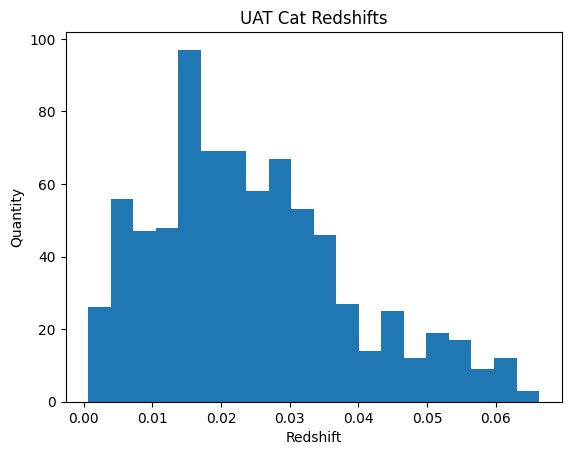

In [107]:
%matplotlib inline
plt.hist(uatTable['redshift'],bins=20,histtype='bar')
plt.xlabel('Redshift'); plt.ylabel('Quantity')
plt.title('UAT Cat Redshifts')

In [108]:
matchedTab=Table.read(cwd+'data/UAT_GBT_matched3.fits')

In [109]:
for i in range(len(matchedTab)):
    NAME=matchedTab['name'][i]
    if NAME==5066:
        print(i)

146


In [110]:
matchedTab[146]

mu,e_mu,redshift,radeg,decdeg,zmag,snr,name,RA,DEC
float64,float64,float64,float64,float64,float32,float32,int64,float64,float64
33.53472658,0.311951206,0.016888,142.782913,46.384167,15.5,0.0,5066,142.782913,46.384167


In [111]:
maxFenc=np.max(ptab['flux_erg']); maxFenc
mu=matchedTab['mu'][146]; mu # distance modulus

d=np.log(mu/5+1); print(d,'pc, or:') # pc
d_cm=d*3.086E18; print(d_cm,'cm') # pc to cm

2.0421219114028366 pc, or:
6.301988218589153e+18 cm


In [388]:
def getLogMass(LW1_array):
    '''
    Reads in the W1 luminosities calculations with the +/- error on the distance modulus, including the calculation without error propagation, 
    and converts those luminosities into stellar masses, via equation from Jarrett 2023.

    Inputs:
        LW1_upper = W1 luminosity including the +error on the distance modulus; distance modulus will be the largest source of error; erg/s
        LW1_med =  W1 luminosity NOT including the +/-error on the distance modulus; erg/s
        LW1_lower = W1 luminosity including the -error on the distance modulus; distance modulus will be the largest source of error; erg/s
        
    RETURNS:
        logMstar = numpy array of including the upper, median, and lower W1 stellar mass calculations.
    '''
    
    A0= -12.62185; A1= 5.00155; A2= -0.43857; A3= 0.01593
    
    logMstar_upper=A0+(A1*np.log10(LW1_array[0]))+(A2*(np.log10(LW1_array[0]))**2)+(A3*(np.log10(LW1_array[0]))**3)
    logMstar_med=A0+(A1*np.log10(LW1_array[1]))+(A2*(np.log10(LW1_array[1]))**2)+(A3*(np.log10(LW1_array[1]))**3)
    logMstar_lower=A0+(A1*np.log10(LW1_array[2]))+(A2*(np.log10(LW1_array[2]))**2)+(A3*(np.log10(LW1_array[2]))**3)
    
    logMstar=np.array([logMstar_upper,logMstar_med,logMstar_lower])
    
    return logMstar

def getLW1(ptab,galNum):
    '''
    Takes in ptab and matched table values for distance modulus plus error, then calculates the luminosity two
    different ways; one in relation to the distance modulus and absolute magnitude, and the other through the flux-
    luminosity relation using the max enclosed flux from photutils.

    Inputs:
        ptab = table created from output photometry file via photwrapper, made earlier in getWiseFits func

    RETURNS:
        LW1_mag = numpy array including the upper, median, and lower W1 Luminosities via distance modulus, mu, 
                     and absolute magnitude of galaxy; erg/s.
        LW1_flux = numpy array including the upper, median, and lower W1 Luminosities via flux-luminosity relation;
                     erg/s.
    '''

    ind=np.where(matchedTab['AGCnr']==galNum)
    
    maxFenc=np.max(ptab['flux_erg']) # flux in ergs/cm^2 s
    mu=matchedTab['mu'][ind] # distance modulus
    mu_err=matchedTab['e_mu'][ind]
    
    d_Upper=(10**((mu+mu_err)/5+1))*3.086E18 # gets d in pc, converts to cm; includes upper error for mu
    d_Med=(10**(mu/5+1))*3.086E18 # gets d in pc, converts to cm
    d_Lower=(10**((mu-mu_err)/5+1))*3.086E18 # gets d in pc, converts to cm; includes lower error for mu
    d=np.array([d_Upper,d_Med,d_Lower])
    
    ###############################################################

    ### W1 Luminosity via Jarrett
    m=np.min(ptab['mag'])

    M_Upper=m-(mu+mu_err)
    M_Med=m-mu
    M_Lower=m-(mu-mu_err)
    
    M=np.array([M_Upper,M_Med,M_Lower])
    
    LW1_mag_Upper=10**(-0.4*(M_Upper-3.24))
    LW1_mag_Med=10**(-0.4*(M_Med-3.24))
    LW1_mag_Lower=10**(-0.4*(M_Lower-3.24))
    
    LW1_mag=np.array([LW1_mag_Upper,LW1_mag_Med,LW1_mag_Lower])

    ### Luminosity via enclosed flux
    LW1_flux_Upper=maxFenc*(4*np.pi*d_Upper**2)/3.846E33
    LW1_flux_Med=maxFenc*(4*np.pi*d_Med**2)/3.846E33
    LW1_flux_Lower=maxFenc*(4*np.pi*d_Lower**2)/3.846E33
    
    LW1_flux=np.array([LW1_flux_Upper,LW1_flux_Med,LW1_flux_Lower])

    return LW1_mag,LW1_flux

$log_{10}Mstar = A0 + A1(log_{10}L_{W1}) + A2(log_{10}L_{W1})^2 + A3(log_{10}L_{W1})^3$

$L_{W1}[L_{\odot}] = 10^{-0.4(M-M_{sun})}$

In [361]:
LW1_mag,LW1_flux=getLW1(ptab,5066)
LW1_mag

array([[3.59259757e+10],
       [2.69543020e+10],
       [2.02230943e+10]])

In [362]:
getLogMass(LW1_flux)

array([[9.83659269],
       [9.70720309],
       [9.57938945]])

# Testing function

In [ ]:
ptab,e = getWiseFits(gbt[16],plotting=True,imsize=180,changeSize=False)
print(np.max(ptab['flux']),np.max(ptab['sma_arcsec']))

In [ ]:
import scipy.ndimage as ndi

In [ ]:
segmap=e.segmentation.data == e.cat.label[e.objectIndex]
plt.figure()
plt.imshow(segmap)

mask_data = e.segmentation.data - segmap*e.cat.label[e.objectIndex]
plt.figure()
plt.imshow(mask_data)

segmap_float = ndi.uniform_filter(np.float64(mask_data),size=10)
plt.figure()
plt.imshow(segmap_float)

mask = segmap_float > 0.1
plt.figure()
plt.imshow(5*mask+segmap)

In [ ]:
e.cat.to_table()
e.cat.segment_flux[0]

In [ ]:
ptab

In [ ]:
e.plot_profiles()

In [ ]:
ptab = getLegacyfits(gbt[6],plotting=True)

In [ ]:
ptab

In [ ]:
e.segmentation

In [ ]:
UNWISE_PIXSCALE = 2.75
LEGACY_PIXSCALE = 1
        
# gets the W1-4 .fits files as well as the legacy images for the galaxy
display_legacy_unwise(ra,dec,galname,imsize_arcsec=120)

imsize_arcsec = 120 # length/width of image in arcseconds
imsize_pixels_legacy = round(imsize_arcsec/LEGACY_PIXSCALE)
imsize_pixels_unwise = round(imsize_arcsec/UNWISE_PIXSCALE)
    
# sorts the noise files from the image files that were previously downloaded
t = get_unwise_image(ra,dec,galid=galname,makeplots=False,imsize=str(imsize_pixels_unwise))
imagefiles = t[0]
noisefiles = t[1]
imagefiles.sort()
noisefiles.sort()

In [ ]:
e = photwrapper.ellipse(imname)


In [ ]:
%load_ext autoreload
%autoreload 2
            
imname = f'{galname}-legacy-120-r.fits'

    
e = photwrapper.ellipse(imname)
    
e.detect_objects()
    
test = e.cat.to_table()
    
e.find_central_object()
e.get_ellipse_guess()
e.measure_phot()     
e.calc_sb()
e.convert_units()
    
e.write_phot_tables()
e.write_phot_fits_tables(); print()
        
e.show_seg_aperture()
e.draw_guess_ellipse_mpl()
e.draw_phot_apertures()

ptab = Table.read(f'{galname}-legacy-120-r-phot.fits')

In [ ]:
e.segmentation

In [ ]:
plt.imshow(e.image,origin='lower')

In [ ]:
from photutils import detect_threshold, detect_sources

# changing to remove deprecated function source_properties
#from photutils import source_properties
from photutils.segmentation import SourceCatalog

In [ ]:
seg=detect_sources(e.image)

In [ ]:
e.threshold

In [231]:
gbt

name,RA,DEC
int64,float64,float64
3611,104.299164,20.437222
3634,105.402916,14.134722
4455,127.886665,-1.198056
4510,130.210007,73.486382
5066,142.782913,46.384167
5645,156.797485,71.417496
6015,163.509995,46.0275
10244,242.48082,43.128887
10483,248.62001,76.029167
